# **Cerebral Stroke Prediction**
Team 5 - Anna Wei, Angela Liou, Cindy Chang, Stephanie Chen

# **Problem Statement**

A cerebral stroke occurs when blood flow to a part of the brain is interrupted, causing brain cells to die and potentially leading to severe neurological damage or death. In this project, we use patients’ medical history and demographic information to build a predictive model that estimates the risk of stroke. The objective is to identify high-risk individuals earlier, supporting timely medical intervention and reducing long-term healthcare costs.

This problem is particularly important for at-risk patients, healthcare providers, policymakers, and insurance organizations. Early identification of at-risk patients enables preventive care, improves patient outcomes, and allows hospitals and insurers to allocate resources more efficiently.

# **Dataset Info**

This dataset (2.64 MB) was found on Kaggle and retrieved from Mendeley Data on 16-Dec-2024: https://data.mendeley.com/datasets/x8ygrw87jw/1.

The original data source was collected from HealthData.gov by Liu, Fan & Wu (2019). It contains records from 43400 potential patients and includes 12 attributes with various data types. These variables include information on patients’ unique ID, gender, age, hypertension, heart disease, marital status, occupation type, residency, average glucose level, BMI, smoking status, and stroke.

# **Import Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

# **Data Exploration and Cleaning**

## 1.Load and Explore the `Stroke.csv` Dataset
We begin by loading the dataset and examining its structure. This includes checking the number of observations, feature types, and summary statistics. These steps help identify potential data quality issues such as missing values, incorrect variable types, and unusual distributions.

In [ ]:
url='https://raw.githubusercontent.com/cindych12/810-project/refs/heads/main/dataset.csv'
stroke_data=pd.read_csv(url)

In [ ]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [ ]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


For our initial exploration, the team selected several columns and analyzed the relationships separately for numeric variables (age, BMI, and average glucose level) using sns.pairplot and categorical variables (hypertension, heart disease, and smoking status) using sns.countplot. This distinction allowed us to identify different types of patterns, such as clusters and scatterpoints among numeric features and various proportion patterns and distributions across different categories.

## 2.Exploratory Data Analysis

**Stroke Distribution Across Categorical Features**

To explore how stroke occurrence varies across key categorical variables, we visualize the distribution of stroke vs. non-stroke cases for hypertension, heart disease, and smoking status.

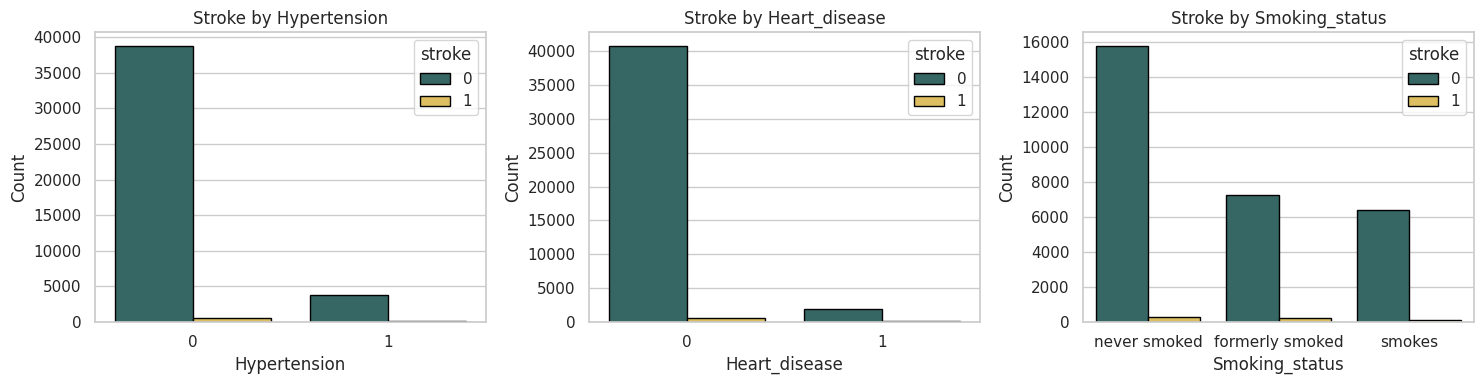

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


cat_vars = ['hypertension', 'heart_disease', 'smoking_status']

plt.figure(figsize=(15, 4))
custom_colors = ['#2F6F6B', '#F2C94C']

for i, var in enumerate(cat_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(
        data=stroke_data,
        x=var,
        hue='stroke',
        palette=custom_colors,
        edgecolor='black'
    )
    plt.title(f'Stroke by {var.capitalize()}')
    plt.xlabel(var.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


Stroke frequency was examined across hypertension, heart disease, and smoking status categories. The bar charts show no strong association between these individual variables and stroke occurrence, suggesting that stroke risk may depend on multiple interacting factors rather than a single categorical variable.

**Relationships Among Numerical Features**

We next examine the relationships between numerical features and stroke outcomes using pairplots.

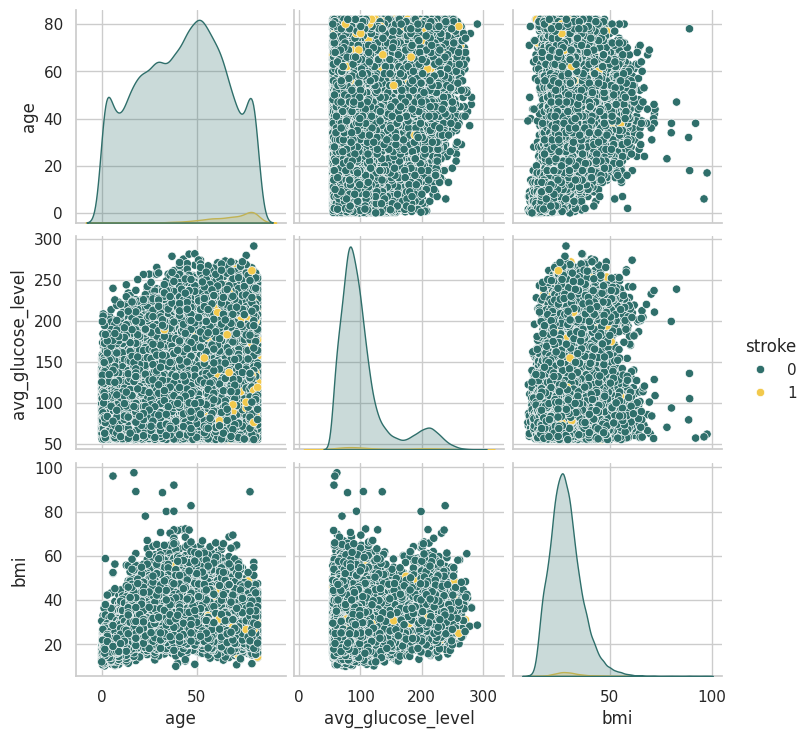

In [ ]:
sns.pairplot(
    stroke_data[['age', 'avg_glucose_level', 'bmi', 'stroke']],
    hue='stroke',
    palette={0: '#2F6F6B', 1: '#F2C94C'}
)
plt.show()

1. Age and BMI: Within the BMI chart, very few individuals below the age of 40 report stroke cases. As we can see, most stroke cases are concentrated among older individuals, suggesting age may be a strong indicator for stroke.

2. Age and Average Glucose Level: Stroke cases also tend to appear among older individuals with higher average glucose levels, suggesting that both age and elevated glucose may jointly contribute to stroke risk.


**Exploring Age with Medical History Variables**

We further examine how age interacts with cardiovascular conditions such as hypertension and heart disease.

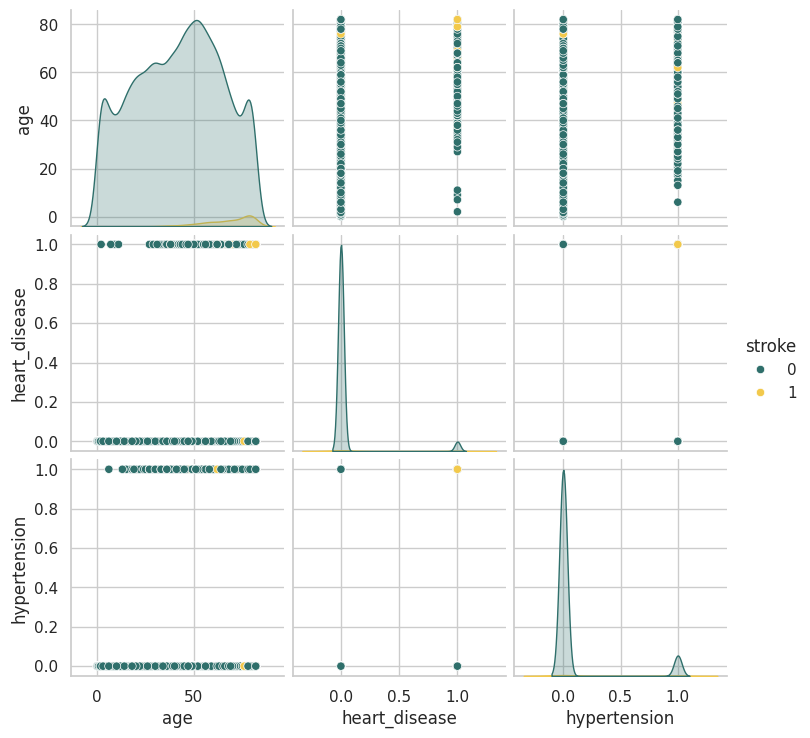

In [ ]:
sns.pairplot(
    stroke_data[['age', 'heart_disease', 'hypertension', 'stroke']],
    hue='stroke',
    palette={0: '#2F6F6B', 1: '#F2C94C'}
)
plt.show()


This pairplot illustrates the relationships among age, heart disease, hypertension, and stroke outcomes. Stroke cases (gold points) are concentrated among older individuals, especially those with heart disease or hypertension. In contrast, younger individuals show very few stroke events regardless of medical history. These patterns indicate that stroke risk is influenced by multiple health factors simultaneously and may not be explained by any single variable alone, reinforcing the need for machine learning models to capture these complex patterns.

In [ ]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## 3.Missing Values

In [ ]:
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,1462


**Handling Missing Categorical Values**

The variable`smoking_status` contains missing entries. Since this feature is categorical, we replace missing values with a separate category "unknown" to avoid losing data. This preserves all observations and allows the model to learn whether missingness itself carries predictive information.

In [ ]:
stroke_data["smoking_status"] = stroke_data["smoking_status"].fillna("unknown")
print(stroke_data.head(5))

      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0          unknown   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6          unknown   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1          unknown   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0  


## 4.Feature and Target Definition

In [ ]:
X = stroke_data.drop(columns=['id','stroke'], axis=1)
y = stroke_data['stroke']

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34720, 10), (8680, 10), (34720,), (8680,))

## 5.Summary
EDA shows that stroke cases are primarily concentrated among older individuals, especially those with high glucose levels, heart disease, or hypertension. In contrast, single categorical variables alone do not strongly separate stroke from non-stroke cases. To address missing data, we filled the missing values in smoking_status with an "unknown" category and prepared the necessary feature matrix and target variable for model training. The main challenges moving forward include the severe class imbalance and the need for machine learning models to capture the complex relationships among multiple health factors. These issues will be handled in the subsequent preprocessing and modeling stages.


# **Preprocessing Pipeline**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

cat_attribs = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status"]
num_attribs = ["age", "avg_glucose_level", "bmi"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(drop="first", handle_unknown="ignore")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)


preprocess_pipeline = ColumnTransformer([
    ("cat", cat_pipeline, cat_attribs),
    ("num", num_pipeline, num_attribs)
])


In this preprocessing pipeline, the dataset is separated into categorical and numerical features to ensure that each is prepared using the most appropriate transformation techniques. Categorical variables, such as gender, hypertension, heart disease, marital status, work type, residence type, and smoking status, are processed using a pipeline that first applies mode imputation to replace missing values with the most frequent category. These variables are then transformed using one-hot encoding, with `drop="first"` applied to reduce multicollinearity and `handle_unknown="ignore"` to ensure the model can safely process unseen categories in the test data.

Numerical variables, including age, average glucose level, and BMI, are processed through a separate pipeline. Missing values in the numerical features are handled using median imputation, which is appropriate for BMI due to its susceptibility to outliers and skewed distributions. After imputation, the numerical features are standardized using StandardScaler to ensure all continuous variables are placed on a comparable scale.

###**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr_pipe = make_pipeline(preprocess_pipeline, LogisticRegression(max_iter=1000, class_weight="balanced")
)

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
print(f'Balanced accuracy for Logistic Regression: {balanced_accuracy_score(y_test, y_pred_lr):.3f}')

Balanced accuracy for Logistic Regression: 0.773


The pipeline above combines the shared preprocessing steps with a linear, interpretable Logistic Regression classifier into a single workflow. After preprocessing, the cleaned features are passed into a logistic regression model with `class_weight="balanced"` to partially correct for the severe class imbalance between stroke and non-stroke patients. This `lr_pipe` serves as our baseline linear model and provides a simple benchmark before introducing more complex tree-based and ensemble methods.

After fitting the Logistic Regression pipeline on the training data and evaluating it on the test set, the model achieved a strong balanced accuracy score of 0.733. This indicates that the baseline logistic model benefits from class-weight balancing and performs better than a majority-class classifier. However, in this highly imbalanced setting, the model still misses a significant number of stroke cases, which is problematic in a medical decision-making context. These results motivate the need for more flexible models, advanced hyperparameter tuning, and threshold selection to further improve sensitivity to stroke patients while keeping false positives at a manageable level.

###**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = make_pipeline(preprocess_pipeline,
          RandomForestClassifier(n_estimators=300,
                                max_depth=None,
                                class_weight="balanced",
                                random_state=42
))

rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)
print(f'Balanced accuracy for Random Forest: {balanced_accuracy_score(y_test, y_pred_rf):.3f}')

Balanced accuracy for Random Forest: 0.500


The pipeline above combines preprocessing and a bagging-based Random Forest classifier into a single workflow. The cleaned dataset is passed into a 300-tree Random Forest model that uses class-weight balancing to address class imbalance in stroke prediction. The `rf_pipe` represents the baseline bagging model, ensuring consistent preprocessing across training and testing while enabling threshold tuning, hyperparameter optimization, and evaluation in a controlled manner.

After fitting the Random Forest pipeline on the training data and evaluating it on the test set, the model achieved a balanced accuracy score of 0.500. This indicates that the Random Forest model did not perform well in its baseline form, since a balanced accuracy of 0.50 suggests that the model is performing no better than random guessing and is struggling to correctly identify stroke cases. This poor performance is likely a result of the severe class imbalance in the dataset.

###**XGBoost**

In [ ]:
from xgboost import XGBClassifier

xgb_pipe = make_pipeline(
    preprocess_pipeline,
    XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=98,
        random_state=42
    )
)

xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_pipe.predict(X_test)
print("Balanced accuracy for XGBoost: {:.3f}".format(balanced_accuracy_score(y_test, y_pred_xgb)))

Balanced accuracy for XGBoost: 0.726


XGBoost is another modeling technique used in this project that applies boosting, where each new decision tree focuses on correcting the mistakes of the previous ones. This allows the model to continuously improve its predictions by learning from past errors. In this pipeline, boosting is directly implemented through the XGBClassifier, making it a core part of the modeling process.

After fitting the pipeline, the balanced accuracy score for XGBoost is 0.726, performing stronger than the Random Forest model and slightly behind Logistic Regression. One reason this model is especially effective for stroke prediction is that stroke cases are rare and highly imbalanced. The use of `scale_pos_weight = 98` forces the model to place greater emphasis on stroke occurrences, improving its ability to correctly identify high-risk patients.

# **Evaluating Model Performance**




###**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Report")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8523
           1       0.05      0.80      0.10       157

    accuracy                           0.74      8680
   macro avg       0.52      0.77      0.48      8680
weighted avg       0.98      0.74      0.84      8680

Random Forest Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8523
           1       0.00      0.00      0.00       157

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680

XGBoost Report
              precision    recall  f1-score   support

           0       0.99      0.76      0.86      8523
           1       0.05      0.69      0.09       157

    accuracy                           0.76      8680
   macro avg       0.52      0.73      0.48      8680
weighted av

The initial classification reports show that all three baseline models achieve high overall accuracy. However, this metric is misleading due to the severe class imbalance in the dataset. While the majority class (non-stroke) is predicted well, all models struggle to correctly identify the minority stroke cases, which are the most clinically important.

Logistic Regression achieves the highest recall for the stroke class, meaning it detects more true stroke cases than the other models, but it does so with very low precision. Random Forest performs exceptionally well on the majority class but fails to detect any stroke cases under the initial settings. XGBoost identifies some stroke cases but still suffers from extremely low precision.

These results highlight the limitations of using untuned, default models on imbalanced medical data. They also motivate the need for additional evaluation tools: such as prediction probabilities, confusion matrices, and ROC–AUC to better understand model behavior beyond accuracy alone. In the next steps, we apply hyperparameter tuning, threshold adjustments, and ensemble methods to improve minority-class detection and achieve a more clinically meaningful performance.

###**Compute Prediction Probability**

In [ ]:
import pandas as pd

y_proba_lr = lr_pipe.predict_proba(X_test)[:, 1]
y_proba_rf = rf_pipe.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_pipe.predict_proba(X_test)[:, 1]


proba_df = pd.DataFrame({
    "LR_prob": y_proba_lr,
    "RF_prob": y_proba_rf,
    "XGB_prob": y_proba_xgb
})

proba_df.describe()

,LR_prob,RF_prob,XGB_prob
count,8680.000000,8680.000000,8680.000000
mean,0.308620,0.016944,0.268890
std,0.279082,0.039059,0.304880
min,0.003839,0.000000,0.000259
25%,0.061410,0.000000,0.003386
50%,0.220877,0.000000,0.134336
75%,0.523298,0.016667,0.498529
max,0.967855,0.590000,0.969621


Probability predictions were generated for all three models across the same test dataset (8680 observations). Overall, Logistic Regression and XGBoost spread patients across a relatively wide range of probabilities: most scores fall between 0 and 0.5, but the upper quartile (75%) is close to 0.5 and the maximum is around 0.97. This means both models clearly separate some patients as higher risk and provide more informative, graded risk scores.

In contrast, the Random Forest probabilities are almost all squeezed near zero: the median is 0, and even the 75th percentile is only about 0.017. This tells us that Random Forest is extremely conservative under the imbalanced data and rarely assigns meaningful non-zero stroke risk.

In short, the table indicates that Logistic Regression and especially XGBoost produce much more discriminative probability distributions, while Random Forest underuses the probability range, which limits its usefulness for threshold tuning and risk categorization.

###**ROC-AUC**

In [ ]:
from sklearn.metrics import roc_auc_score

print("LR AUC:", roc_auc_score(y_test, y_proba_lr))
print("RF AUC:", roc_auc_score(y_test, y_proba_rf))
print("XGB AUC:", roc_auc_score(y_test, y_proba_xgb))


LR AUC: 0.8395589005695344
RF AUC: 0.7764355871822293
XGB AUC: 0.8122681900081532


All three models achieve AUC values well above 0.5, indicating that they are learning meaningful separation between stroke and non-stroke cases. Logistic Regression attains the highest ROC–AUC at around 0.84, followed by XGBoost (≈0.81), while Random Forest has the lowest AUC (≈0.78). We therefore take all three forward into the subsequent hyperparameter tuning, threshold selection, and ensemble modeling, while paying particular attention to how Logistic Regression and XGBoost behave under the cost–benefit framework.

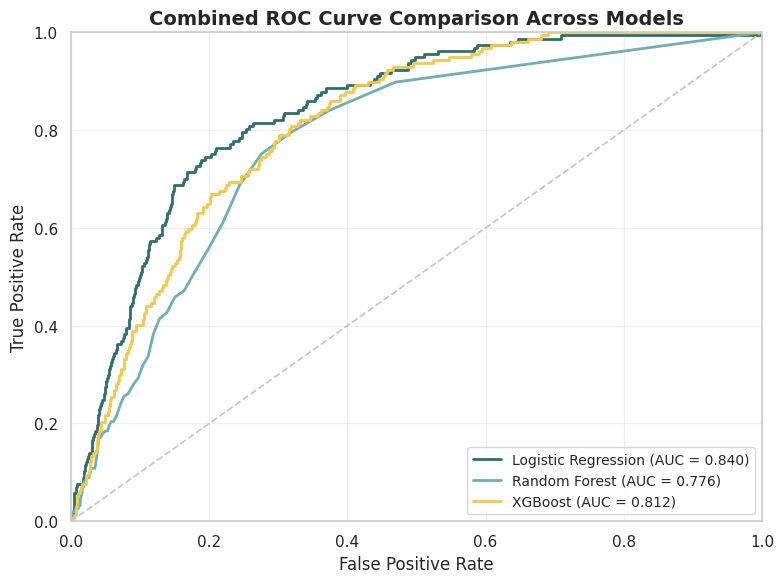

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)


thr_lr = 0.30
thr_rf = 0.30
thr_xgb = 0.35

def operating_point(y_true, y_proba, threshold):
    y_pred = (y_proba >= threshold).astype(int)
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return fpr, tpr

lr_point  = operating_point(y_test, y_proba_lr, thr_lr)
rf_point  = operating_point(y_test, y_proba_rf, thr_rf)
xgb_point = operating_point(y_test, y_proba_xgb, thr_xgb)


lr_color  = "#2F6F6B"
rf_color  = "#6FAFB1"
xgb_color = "#F2C94C"


plt.figure(figsize=(8, 6))

plt.plot(fpr_lr,  tpr_lr,  linewidth=2,
         label=f"Logistic Regression (AUC = {auc_lr:.3f})",
         color=lr_color)

plt.plot(fpr_rf,  tpr_rf,  linewidth=2,
         label=f"Random Forest (AUC = {auc_rf:.3f})",
         color=rf_color)

plt.plot(fpr_xgb, tpr_xgb, linewidth=2,
         label=f"XGBoost (AUC = {auc_xgb:.3f})",
         color=xgb_color)


plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1.3, color="#C7C7C7")


plt.xlim(0, 1)
plt.ylim(0, 1)
plt.margins(x=0, y=0)


plt.title("Combined ROC Curve Comparison Across Models", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


###**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

def stroke_benefit_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    return cm[1,1] * 10 + cm[0,1] * -1 + cm[1,0] * -100

lr_model = lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print('Printing confusion matrix to examine:')
print(confusion_matrix(y_test, y_pred_lr, labels=[0, 1]), '\n')
print('The benefit score under stroke prediction strategy is %d.' % stroke_benefit_score(y_test, y_pred_lr))

Printing confusion matrix to examine:
[[6338 2185]
 [  31  126]] 

The benefit score under stroke prediction strategy is -4025.


In [ ]:
rf_model = rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('Printing confusion matrix to examine:')
print(confusion_matrix(y_test, y_pred_rf, labels=[0, 1]), '\n')

print('The benefit score under stroke prediction strategy is %d.' % stroke_benefit_score(y_test, y_pred_rf))

In [ ]:
xgb_model = xgb_pipe.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('Printing confusion matrix to examine:')
print(confusion_matrix(y_test, y_pred_xgb, labels=[0, 1]), '\n')

print('The benefit score under stroke prediction strategy is %d.' % stroke_benefit_score(y_test, y_pred_xgb))

The confusion matrix equation above shows that predicting an actual stroke is a large benefit, predicting a false stroke is a minor cost. However, missing a stroke will be a massive cost and if it's true negative then it is neutral.

Our scoring system shows a negative score of –4025 for the Logistic Regression model, meaning the model still incurs cost, mainly due to the 31 missing stroke-risk patients.

The Random Forest model results in a negative score of –15702, which is extremely costly and explained by its 157 missed stroke cases.

The XGBoost model produces a negative score of –5767, driven by 48 missed stroke-risk patients, performing better than Random Forest but still worse than Logistic Regression under this cost framework.

Overall, these results indicate that using the default threshold of 0.5 is suboptimal for all models. Lowering the threshold is necessary to reduce missed stroke cases, improve patient safety, and increase the overall benefit score.

#**Hyperparameter Tuning**

### **Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd


param_grid = [
    {
        "logisticregression__C": [0.001, 0.01, 0.1, 1, 10],
        "logisticregression__penalty": ["l1", "l2"],
        "logisticregression__solver": ["liblinear", "saga"],
        "logisticregression__class_weight": ["balanced"]
    }
]

print("Parameter grid:")
print(param_grid)


grid_lr_search = GridSearchCV(
    estimator=lr_pipe,
    param_grid=param_grid,
    scoring="balanced_accuracy",
    cv=3,
    n_jobs=-1
)


grid_lr_search.fit(X_train, y_train)
print("The best Logistic Regression parameters are ",grid_lr_search.best_params_)
print("Best Logistic Regression Balanced Accuracy: ", grid_lr_search.best_score_)


grid_lr_results = pd.DataFrame(grid_lr_search.cv_results_)
grid_lr_results.sort_values(by="mean_test_score", ascending=False, inplace=True)


grid_lr_results.filter(regex="(^param_|mean_test_score)", axis=1).head()

Parameter grid:
[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10], 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__solver': ['liblinear', 'saga'], 'logisticregression__class_weight': ['balanced']}]
The best Logistic Regression parameters are  {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Best Logistic Regression Balanced Accuracy:  0.7786412440627014


,param_logisticregression__C,param_logisticregression__class_weight,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
3,0.001,balanced,l2,saga,0.778641
6,0.010,balanced,l2,liblinear,0.776685
10,0.100,balanced,l2,liblinear,0.776376
7,0.010,balanced,l2,saga,0.775931
4,0.010,balanced,l1,liblinear,0.775742


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
import pandas as pd

param_distribs = [
    {'logisticregression__C': loguniform(0.001, 10),
      'logisticregression__penalty': ['l1', 'l2'],
      'logisticregression__solver': ['liblinear', 'saga'],
      'logisticregression__class_weight': ['balanced']
    }
]

print("Parameter distributions:")
print(param_distribs)


random_lr_search = RandomizedSearchCV(
    estimator=lr_pipe,
    param_distributions=param_distribs,
    n_iter=25,
    cv=3,
    scoring='balanced_accuracy',
    random_state=42,
    n_jobs=-1
)


random_lr_search.fit(X_train, y_train)
print("The best Logistic Regression parameters are ", random_lr_search.best_params_)
print("Best Logistic Regression Balanced Accuracy: ", random_lr_search.best_score_)


random_lr_res = pd.DataFrame(random_lr_search.cv_results_)
random_lr_res.sort_values(by='mean_test_score', ascending=False, inplace=True)


random_lr_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

Parameter distributions:
[{'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb0e86d8740>, 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__solver': ['liblinear', 'saga'], 'logisticregression__class_weight': ['balanced']}]
The best Logistic Regression parameters are  {'logisticregression__C': np.float64(0.0012087541473056963), 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Best Logistic Regression Balanced Accuracy:  0.7778637654068259


,param_logisticregression__C,param_logisticregression__class_weight,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
5,0.001209,balanced,l2,saga,0.777864
8,0.016480,balanced,l2,liblinear,0.777016
11,0.014743,balanced,l2,liblinear,0.776855
16,0.001821,balanced,l2,liblinear,0.776432
22,0.010842,balanced,l2,saga,0.776063


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {
        "logisticregression__C": [0.001, 0.01, 0.1, 1, 10],
        "logisticregression__penalty": ["l1", "l2"],
        "logisticregression__solver": ["liblinear", "saga"],
        "logisticregression__class_weight": ["balanced"]
    }
]

print("Parameter grid:")
print(param_grid)

halving_lr_search = HalvingGridSearchCV(
    lr_pipe,
    param_grid,
    cv=3,
    min_resources="exhaust",
    scoring="balanced_accuracy",
    factor=2,
    n_jobs=-1
)

halving_lr_search.fit(X_train, y_train)
print("The best Logistic Regression parameters are ", halving_lr_search.best_params_)
print("Best Logistic Regression Balanced Accuracy: ", halving_lr_search.best_score_)


halving_lr_results = pd.DataFrame(halving_lr_search.cv_results_)
halving_lr_results.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)

halving_lr_results.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()

Parameter grid:
[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10], 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__solver': ['liblinear', 'saga'], 'logisticregression__class_weight': ['balanced']}]
The best Logistic Regression parameters are  {'logisticregression__C': 0.001, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Best Logistic Regression Balanced Accuracy:  0.7786412440627014


,iter,n_resources,param_logisticregression__C,param_logisticregression__class_weight,param_logisticregression__penalty,param_logisticregression__solver,mean_test_score
38,4,34720,0.001,balanced,l2,saga,0.778641
39,4,34720,0.010,balanced,l2,liblinear,0.776685
35,3,17360,0.010,balanced,l2,liblinear,0.773094
37,3,17360,0.001,balanced,l2,saga,0.772719
36,3,17360,0.001,balanced,l2,liblinear,0.767278


Out of the three tuning methods, Logistic Regression with GridSearch slightly outperformed the Halving Grid Search. All three Balanced Accuracy scores fall within a narrow range of 0.778–0.779, which suggests a reasonable and reliable level of model performance.

###**RandomForest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

rf_param_distribs = {
    "randomforestclassifier__n_estimators": [200, 300, 400],
    "randomforestclassifier__max_depth": [5, 10, 20, None],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
        "randomforestclassifier__class_weight": ["balanced"],
}

print("Random Forest Parameter distributions:")
print(rf_param_distribs)

random_rf_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_param_distribs,
    n_iter=12,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1
)

random_rf_search.fit(X_train, y_train)
print("The best Random Forest parameters are ", random_rf_search.best_params_)
print("Best Random Forest Balanced Accuracy: {:.3f}".format(random_rf_search.best_score_))

random_rf_res = pd.DataFrame(random_rf_search.cv_results_)
random_rf_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

random_rf_res.filter(regex="(^param_|mean_test_score)", axis=1).head()


Random Forest Parameter distributions:
{'randomforestclassifier__n_estimators': [200, 300, 400], 'randomforestclassifier__max_depth': [5, 10, 20, None], 'randomforestclassifier__min_samples_split': [2, 5, 10], 'randomforestclassifier__min_samples_leaf': [1, 2, 4], 'randomforestclassifier__max_features': ['sqrt', 'log2'], 'randomforestclassifier__class_weight': ['balanced']}
The best Random Forest parameters are  {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__class_weight': 'balanced'}
Best Random Forest Balanced Accuracy: 0.773


,param_randomforestclassifier__n_estimators,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_features,param_randomforestclassifier__max_depth,param_randomforestclassifier__class_weight,mean_test_score
4,200,10,2,sqrt,5,balanced,0.773367
11,200,5,1,log2,5,balanced,0.772986
7,300,2,4,sqrt,10,balanced,0.665498
10,200,10,4,log2,20,balanced,0.520336
1,200,10,4,log2,None,balanced,0.518748


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

param_dist_rf = {
    "randomforestclassifier__n_estimators": [200, 300, 400],
    "randomforestclassifier__max_depth": [5, 10, 15, 20, None],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
    "randomforestclassifier__class_weight": ["balanced"]
}

halving_rf_search = HalvingRandomSearchCV(
    rf_pipe,
    param_dist_rf,
    cv=3,
    scoring="balanced_accuracy",
    factor=2,
    n_candidates=20,
    n_jobs=-1,
    random_state=42
)

halving_rf_search.fit(X_train, y_train)

print("The best RandomForest parameters are ", halving_rf_search.best_params_)
print("Best RandomForest Balanced Accuracy: ", halving_rf_search.best_score_)

halving_rf_results = pd.DataFrame(halving_rf_search.cv_results_)
halving_rf_results.sort_values(by=["iter", "mean_test_score"], ascending=False).head()


The best RandomForest parameters are  {'randomforestclassifier__n_estimators': 400, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__class_weight': 'balanced'}
Best RandomForest Balanced Accuracy:  0.6666666666666666


,iter,n_resources,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__n_estimators,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__max_features,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
38,4,192,0.986953,0.011240,0.062897,0.003159,400,5,4,log2,...,0.5,1.0,0.666667,0.235702,39,1.0,1.000000,1.0,1.000000,0.000000
39,4,192,0.441719,0.089313,0.034716,0.006164,200,10,1,sqrt,...,0.5,1.0,0.666667,0.235702,39,1.0,1.000000,1.0,1.000000,0.000000
35,3,96,1.363161,0.261170,0.062995,0.001658,400,2,2,log2,...,0.5,1.0,0.833333,0.235702,31,1.0,1.000000,1.0,1.000000,0.000000
36,3,96,0.973235,0.008966,0.063493,0.005494,400,5,4,log2,...,0.5,1.0,0.833333,0.235702,31,1.0,0.991935,1.0,0.997312,0.003802
37,3,96,0.431218,0.105941,0.033102,0.007447,200,10,1,sqrt,...,0.5,1.0,0.833333,0.235702,31,1.0,0.991935,1.0,0.997312,0.003802


Due to GridSearch being more computationally costly and the similar result patterns observed with Logistic Regression, Random Forest and XGBoost will not be using GridSearch for further tuning.

The outputs above also show that Random Forest tuned with RandomizedSearch (0.773) yielded a better score compared to HalvingRandomSearch (0.667).

###**XGBoost**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

xgb_param_distribs = {
    "xgbclassifier__n_estimators": [100, 200, 300],
    "xgbclassifier__max_depth": [3, 4, 5, 6],
    "xgbclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "xgbclassifier__subsample": [0.6, 0.8, 1.0],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0]
}

print("XGB Parameter distributions:")
print(xgb_param_distribs)

random_xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=xgb_param_distribs,
    n_iter=25,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1
)

random_xgb_search.fit(X_train, y_train)

print("The best XGB parameters are ", random_xgb_search.best_params_)
print("Best XGB Balanced Accuracy: {:.3f}".format(random_xgb_search.best_score_))

random_xgb_res = pd.DataFrame(random_xgb_search.cv_results_)
random_xgb_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

random_xgb_res.filter(regex="(^param_|mean_test_score)", axis=1).head()


XGB Parameter distributions:
{'xgbclassifier__n_estimators': [100, 200, 300], 'xgbclassifier__max_depth': [3, 4, 5, 6], 'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2], 'xgbclassifier__subsample': [0.6, 0.8, 1.0], 'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]}
The best XGB parameters are  {'xgbclassifier__subsample': 0.6, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__colsample_bytree': 0.6}
Best XGB Balanced Accuracy: 0.775


,param_xgbclassifier__subsample,param_xgbclassifier__n_estimators,param_xgbclassifier__max_depth,param_xgbclassifier__learning_rate,param_xgbclassifier__colsample_bytree,mean_test_score
3,0.6,200,6,0.01,0.6,0.774902
23,0.8,100,5,0.05,0.6,0.773477
12,0.8,100,5,0.05,0.8,0.772524
24,0.8,100,3,0.05,1.0,0.771882
13,0.8,100,4,0.05,1.0,0.771686


In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import pandas as pd

param_dist_xgb_halving = {
    "xgbclassifier__n_estimators": [100, 200, 300],
    "xgbclassifier__max_depth": [3, 4, 5, 6],
    "xgbclassifier__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "xgbclassifier__subsample": [0.6, 0.8, 1.0],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0]
}

print("Parameter distributions for XGBoost:")
print(param_dist_xgb_halving)

halving_xgb_search = HalvingRandomSearchCV(
    xgb_pipe,
    param_dist_xgb_halving,
    cv=3,
    factor=2,
    scoring="balanced_accuracy",
    n_candidates=20,
    n_jobs=-1,
    random_state=42
)

halving_xgb_search.fit(X_train, y_train)

print("The best XGB parameters are ", halving_xgb_search.best_params_)
print("Best XGB Balanced Accuracy: ", halving_xgb_search.best_score_)

halving_xgb_results = pd.DataFrame(halving_xgb_search.cv_results_)
halving_xgb_results.sort_values(by=["iter", "mean_test_score"], ascending=False, inplace=True)

halving_xgb_results.filter(regex='(iter|^param_|mean_test_score|n_resources)', axis=1).head()


Parameter distributions for XGBoost:
{'xgbclassifier__n_estimators': [100, 200, 300], 'xgbclassifier__max_depth': [3, 4, 5, 6], 'xgbclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2], 'xgbclassifier__subsample': [0.6, 0.8, 1.0], 'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0]}
The best XGB parameters are  {'xgbclassifier__subsample': 0.8, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 6, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__colsample_bytree': 0.8}
Best XGB Balanced Accuracy:  0.6666666666666666


,iter,n_resources,param_xgbclassifier__subsample,param_xgbclassifier__n_estimators,param_xgbclassifier__max_depth,param_xgbclassifier__learning_rate,param_xgbclassifier__colsample_bytree,mean_test_score
38,4,192,0.8,100,6,0.20,0.8,0.666667
39,4,192,0.6,100,4,0.01,0.6,0.666667
37,3,96,0.6,100,4,0.01,0.6,0.972917
35,3,96,0.6,100,3,0.10,0.6,0.822917
36,3,96,0.8,100,6,0.20,0.8,0.822917


After tuning the XGBoost model with RandomizedSearch and HalvingRandomSearch, results indicate that the Balanced Accuracy score performed better under RandomizedSearch, with a score of 0.775.

Overall, the tree-based models returned higher balanced accuracy scores under randomized approaches, while Logistic Regression shows no apparent performance difference when it comes to different search strategies since it is a simple linear model. Based on the trade-off between performance and runtime, we treat RandomizedSearchCV as the primary and most cost-efficient tuning method for all three models in the remainder of our analysis.

#**Threshold Tuning**

Threshold tuning adjusts the probability cutoff used to classify a patient as stroke-positive.

Lowering the threshold increases recall and helps detect more stroke cases in this highly imbalanced dataset.

We tested multiple thresholds to identify the best trade-off between balanced accuracy and cost-benefit performance.

###**Logistic Regression**

In [ ]:
best_lr =random_lr_search.best_estimator_
y_proba_lr = best_lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import balanced_accuracy_score, confusion_matrix

def stroke_benefit_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TN, FP = cm[0]
    FN, TP = cm[1]
    return TP*10 + FP*(-1) + FN*(-100)

thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.50]

for t in thresholds:
    y_pred_t = (y_proba_lr >= t).astype(int)
    bal_acc = balanced_accuracy_score(y_test, y_pred_t)
    benefit = stroke_benefit_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Balanced Acc={bal_acc:.3f} | Benefit={benefit}")

Threshold=0.05 | Balanced Acc=0.561 | Benefit=-5971
Threshold=0.10 | Balanced Acc=0.626 | Benefit=-4853
Threshold=0.15 | Balanced Acc=0.667 | Benefit=-4212
Threshold=0.20 | Balanced Acc=0.692 | Benefit=-4022
Threshold=0.25 | Balanced Acc=0.717 | Benefit=-3644
Threshold=0.30 | Balanced Acc=0.731 | Benefit=-3622
Threshold=0.35 | Balanced Acc=0.741 | Benefit=-3800
Threshold=0.50 | Balanced Acc=0.771 | Benefit=-4007


Logistic Regression performs the best when Threshold = 0.30, with Balance Accuracy score = 0.731 and benefit score at -3622

###**RandomForest**

In [ ]:
best_rf = random_rf_search.best_estimator_

y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest Threshold Tuning ===")

thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.50]

for t in thresholds:
    y_pred_t = (y_proba_rf >= t).astype(int)
    bal_acc = balanced_accuracy_score(y_test, y_pred_t)
    benefit = stroke_benefit_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Balanced Acc={bal_acc:.3f} | Benefit={benefit}")


=== Random Forest Threshold Tuning ===
Threshold=0.05 | Balanced Acc=0.569 | Benefit=-5776
Threshold=0.10 | Balanced Acc=0.608 | Benefit=-5174
Threshold=0.15 | Balanced Acc=0.649 | Benefit=-4466
Threshold=0.20 | Balanced Acc=0.693 | Benefit=-3893
Threshold=0.25 | Balanced Acc=0.719 | Benefit=-3883
Threshold=0.30 | Balanced Acc=0.733 | Benefit=-3865
Threshold=0.35 | Balanced Acc=0.738 | Benefit=-4003
Threshold=0.50 | Balanced Acc=0.764 | Benefit=-4018


RandomForest performs the best when Threshold = 0.30, with Balance Accuracy score = 0.733 and benefit score at -3865

###**XGBoost**

In [ ]:
best_xgb = random_xgb_search.best_estimator_

y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Threshold Tuning ===")

thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.50]

for t in thresholds:
    y_pred_t = (y_proba_xgb >= t).astype(int)
    bal_acc = balanced_accuracy_score(y_test, y_pred_t)
    benefit = stroke_benefit_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Balanced Acc={bal_acc:.3f} | Benefit={benefit}")


=== XGBoost Threshold Tuning ===
Threshold=0.05 | Balanced Acc=0.500 | Benefit=-6953
Threshold=0.10 | Balanced Acc=0.560 | Benefit=-5931
Threshold=0.15 | Balanced Acc=0.609 | Benefit=-5144
Threshold=0.20 | Balanced Acc=0.666 | Benefit=-4291
Threshold=0.25 | Balanced Acc=0.686 | Benefit=-4063
Threshold=0.30 | Balanced Acc=0.706 | Benefit=-3887
Threshold=0.35 | Balanced Acc=0.733 | Benefit=-3534
Threshold=0.40 | Balanced Acc=0.742 | Benefit=-3716
Threshold=0.50 | Balanced Acc=0.750 | Benefit=-4251


XGBoost performs the best when Threshold = 0.35, with Balance Accuracy score = 0.733 and benefit score at -3534

#**Ensembles**

### **Voting**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import balanced_accuracy_score

voting_clf = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('cat',
                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('onehotencoder',
                                                                                                 OneHotEncoder(drop='first',
                                                                                                               handle_unknown='ignore'))]),
                                                                                ['gender',
                                                                                 'hypertension',
                                                                                 'heart_disease',
                                                                                 'ever_married',
                                                                                 'work_type',
                                                                                 'Residence_type',
                                                                                 'smoking...
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.01,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=6,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))]))],
                 voting='soft')

Due to the fact that medical data is imbalanced, soft voting is favored for better stroke predictions.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

for name, model in voting_clf.named_estimators_.items():
    y_pred = model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy of {name}: {bal_acc:.4f}")

y_pred_voting = voting_clf.predict(X_test)
bal_acc_voting = balanced_accuracy_score(y_test, y_pred_voting)
print(f"\nBalanced Accuracy of Voting Classifier: {bal_acc_voting:.4f}")

Balanced Accuracy of lr: 0.7709
Balanced Accuracy of rf: 0.7637
Balanced Accuracy of xgb: 0.7500

Balanced Accuracy of Voting Classifier: 0.7679


After threshold tuning for Voting Classifier, its best performance occurs where Threshold = 0.25, Balanced Accuracy = 0.712, and Benefit = -3619. Compared to tuned threshold results earlier, XGBoost remains the best performing model where Threshold = 0.35, Balanced Accuracy = 0.733, and Benefit = -3534.

###**Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_lr),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(),
    stack_method='predict_proba',
    passthrough=False
)

stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('cat',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                  ('onehotencoder',
                                                                                                   OneHotEncoder(drop='first',
                                                                                                                 handle_unknown='ignore'))]),
                                                                                  ['gender',
                                                                                   'hypertension',
                                                                                   'heart_disease',
                                                                                   'ever_married',
                                                                                   'work_type',
                                                                                   'Residence_type',
                                                                                   'smoki...
                                                               interaction_constraints=None,
                                                               learning_rate=0.01,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=6,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=200,
                                                               n_jobs=None,
                                                               num_parallel_tree=None, ...))]))],
                   final_estimator=LogisticRegression(),
                   stack_method='predict_proba')

In [ ]:
from sklearn.metrics import balanced_accuracy_score

y_pred_stack = stacking_clf.predict(X_test)
bal_acc_stack = balanced_accuracy_score(y_test, y_pred_stack)

print(f"Balanced Accuracy of Stacking Classifier: {bal_acc_stack:.4f}")

Balanced Accuracy of Stacking Classifier: 0.5000


In [ ]:
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

print("\n=== Stacking Classifier Threshold Tuning ===")

thresholds = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.50]

for t in thresholds:
    y_pred_t = (y_proba_stack >= t).astype(int)
    bal_acc = balanced_accuracy_score(y_test, y_pred_t)
    benefit = stroke_benefit_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Balanced Acc={bal_acc:.3f} | Benefit={benefit}")


=== Stacking Classifier Threshold Tuning ===
Threshold=0.05 | Balanced Acc=0.725 | Benefit=-6787
Threshold=0.10 | Balanced Acc=0.538 | Benefit=-14166
Threshold=0.15 | Balanced Acc=0.508 | Benefit=-15390
Threshold=0.20 | Balanced Acc=0.500 | Benefit=-15700
Threshold=0.25 | Balanced Acc=0.500 | Benefit=-15700
Threshold=0.30 | Balanced Acc=0.500 | Benefit=-15700
Threshold=0.35 | Balanced Acc=0.500 | Benefit=-15700
Threshold=0.50 | Balanced Acc=0.500 | Benefit=-15700


From Threshold = 0.20 to Threshold = 0.50, the stacking model's Balanced Accuracy has remained 0.500. This means that this model is performing at a chance level and not able to successfully distinguish stroke cases. In addition,the benefit scores have significantly decreased, further confirming that the stacking model is not useful for stroke prediction. One key reason for this poor performance is likely due to the small sample size in the test set, particularly for the minority stroke class. Stacking relies on a second-level (meta) learner to identify patterns in the predictions of base models. However, in this case the medical dataset is imbalanced, so the lack of sufficient information limits the meta-learner to learn meaningful relationships. As a result, the stacking ensemble fails to generalize and collapses to near-random performance.

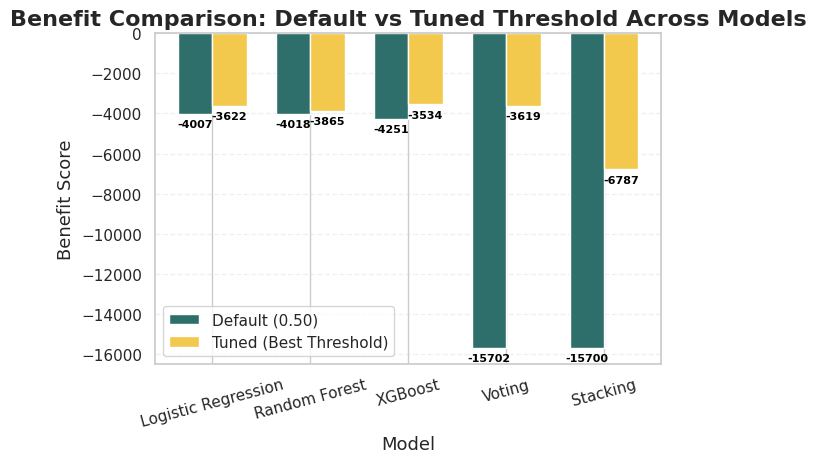

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


models = ["Logistic Regression", "Random Forest", "XGBoost", "Voting", "Stacking"]

default_benefit = [-4007, -4018, -4251, -15702, -15700]
tuned_benefit   = [-3622, -3865, -3534, -3619, -6787]


x = np.arange(len(models))
width = 0.35


default_color = "#2F6F6B"
tuned_color   = "#F2C94C"



bars1 = plt.bar(
    x - width/2, default_benefit, width,
    label="Default (0.50)", color=default_color
)

bars2 = plt.bar(
    x + width/2, tuned_benefit, width,
    label="Tuned (Best Threshold)", color=tuned_color
)


plt.title(
    "Benefit Comparison: Default vs Tuned Threshold Across Models",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Model", fontsize=13)
plt.ylabel("Benefit Score", fontsize=13)
plt.xticks(x, models, rotation=15, fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize=11)



for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height - 670,
            f"{int(height)}",
            ha="center",
            fontsize=8,
            fontweight="bold",
            color="black"
        )


plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

#**Challenges**

One of the major challenges this project faced was during the feature selection process. We originally incorporated feature engineering by creating bins for different age groups, BMI ranges, and glucose levels. However, after consulting with the professor and the TAs, we learned that in medical classification studies, the most accurate approach is to retain numeric values rather than converting them into categories. While this process ended up taking a large amount of time, it ultimately became an important learning moment for us, as it helped us reflect on how to better handle our dataset and allowed us to move forward more confidently with our machine learning model.


Additionally, we made attempts at using other models such as KNN, SVM, and Decision Tree before narrowing down to the earlier models mentioned. Various problems came up while running the stated models, with the major issue being that the balanced accuracy scores, along with other metrics, ended up yielding poor performance. Even after tuning the models, the run process was slow and extensive, and the results still came back low and unreliable. The team researched explanations as to why this was the case and has broken down the reasons into the following:

**K-Nearest Neighbors (KNN):** KNN is highly sensitive to class imbalance. Since actual stroke cases represent a small minority and the model mainly predicts the majority class, this leads to poor recall for the positive class. Even with scaling, KNN performs poorly with larger datasets, and its inference time increases significantly, which makes it less practical for healthcare prediction tasks. Additionally, the dataset includes mixed categorical and continuous features, making distance-based methods less reliable even after preprocessing.

**Support Vector Machine (SVM):** It has been shown that linear SVM struggles to separate the minority class due to the extreme class imbalance and overlapping feature distributions. This makes the model less appealing to use, and with kernel SVMs being computationally expensive on our dataset size, the team decided not to move forward with this technique since it is less appropriate for our use case.

**Decision Tree:** A single decision tree tends to overfit, especially on imbalanced medical data where rare events (stroke = 1) may not form stable splits. When running the Decision Tree model, it produced highly unstable decision boundaries, leading to poor generalization and weak performance on the test set despite tuning. Instead of continuing with this model, we turned to Random Forest as an alternative tree-based model to run our study.

#**Conclusion**

From this project, we learned that out of the three models used—Logistic Regression, Random Forest, and XGBoost—XGBoost performed the best for medical classification in stroke prediction. When working with an imbalanced dataset, techniques such as boosting, model tuning, and threshold selection become crucial in improving model performance. This project demonstrated that relying solely on traditional accuracy metrics can be misleading in healthcare applications, and that balanced accuracy and recall are more meaningful for evaluating rare but critical outcomes such as stroke.

We also learned that proper feature handling plays a major role in medical prediction tasks. Our initial attempt at binning continuous medical values reduced model performance, which reinforced the importance of preserving numeric precision in clinical data. This experience highlighted how closely data understanding and domain knowledge are tied to overall model success.

Another important takeaway from this project is that model selection is not just a technical decision, but one with real-world clinical consequences. While XGBoost achieved the strongest predictive performance, Logistic Regression offered greater interpretability, which is often preferred in healthcare settings where transparency and trust are essential. By incorporating benefit scores and threshold tuning, we were able to directly connect these model choices to actual patient outcomes. In the context of stroke prediction, a false negative (high-risk patient is not identified) can be extremely costly, potentially leading to delayed treatment and severe health consequences.

Overall, this experience helped us understand not only how to build and tune machine learning models, but also how to evaluate and apply them in a realistic and responsible way. Working with imbalanced data, selecting meaningful evaluation metrics, and making decisions with real-world impact in mind are all skills that we can carry into future healthcare analytics projects and other high-risk prediction tasks.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


!apt update > /dev/null 2>&1
!apt install texlive-xetex pandoc > /dev/null 2>&1
!pip install nbconvert > /dev/null 2>&1

import os


notebook_path = "/content/drive/MyDrive/Colab Notebooks/BA810/Team_Project"
notebook_name = "BA810_CohortA_Team05_FinalProject.ipynb"


full_path = os.path.join(notebook_path, notebook_name)


print("File exists:", os.path.exists(full_path))


!jupyter nbconvert "$full_path" --to pdf --output-dir "$notebook_path"

ValueError: mount failed